Code sandbox for playing with Kernel Density Estimation

## General Objective:

Consider an array of bounded numerical data $A=\{a_1,a_2,\ldots,a_n\}$ where $|a_i|\leq M\in\mathbb{R}$. Discretize the region $\tilde{A}=[\min A, \max A]\subseteq\mathbb{R}$ into $k$ equally sized subintervals $A_i$ (where $\bigcup^k_{i=1} A_i=\tilde{A}$). Let the width of the subintervals $|A_i|=\frac{\max A-\min A}{k}$ be the tolerance for the indicator function $I(x;i)$
$$I(x;i)=\begin{cases}1 &, x\in A_i \\ 0 &, \text{ otherwise}\end{cases}$$

Now consider the Gaussian 
$$f(x;\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{(x-\mu)^2/2\sigma^2}$$

On each subinterval $A_i$ for which $I(x)=1$, let 
$$\alpha_i=\int^{\max A_i}_{\min A_i}I(x;i)dx = \text{number of $a_i$ in the subinterval $A_i$}$$

Then define the density function
$$p(x)=\frac{1}{\sum \alpha_i}\sum \alpha_i f(x;a_i,|A_i|) = \frac{1}{A}\sum^k_{i=1} \alpha_i f(x,a_i,\tfrac{\max A-\min A}{k})$$

Worked Example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def subintervals_arr(arr, k:int=100):
    """Takes a discrete array of numerical values and an integral
    number of cuts k. Returns a list of interval endpoints on the
    real line.
    
    Default k=100."""
    if k < 2:
        raise ValueError("k must be greater than 1.")
    
    low, high = min(arr), max(arr)
    si = np.linspace(low, high, k)
    return [(si[i],si[i+1]) for i in range(len(si)-1)]

def gaussian(x, mu:float, var:float):
    """Return the Gaussian distribution over support x."""
    return np.exp(-((x-mu)/(var*np.sqrt(2)))**2)/(var*np.sqrt(2*np.pi))

def indicator_coefs(arr, subintervals):
    """Return a count of values from arr which fall between the bounds
    of the subintervals. Where subintervals is an array-like of the
    form subintervals_arr()."""

    alpha = dict().fromkeys(range(len(subintervals)), 0)
    for n,(i,j) in enumerate(subintervals):
        for x in arr:
            if i <= x <= j:
                alpha[n] += 1    # alpha_n
    return alpha

def midpoint_finder(arr):
    """Takes in an array-like of the form [(x,y)]. Returns a list of
    midpoints for the subintervals."""
    midpts = []
    for (i,j) in arr:
        midpts.append((i+j)/2)
    return midpts

def density(arr, subintervals) -> tuple:
    """Takes in an array-like of numerical data and an array of
    subintervals. Returns a tuple of pdf support and density function
    estimating the histogram of arr."""
    alpha_i = list(indicator_coefs(arr, subintervals).values())
    mu_i = midpoint_finder(subintervals)
    width = subintervals[0][1] - subintervals[0][0]
    sigma = 0.5*width

    x = np.linspace(0.9*subintervals[0][0], 1.1*subintervals[-1][1], 300)
    pdf = 0
    for alpha,mu in zip(alpha_i, mu_i):
        pdf += alpha * gaussian(x, mu, sigma)
    return (x, pdf/len(arr))   # tuple of support and pdf

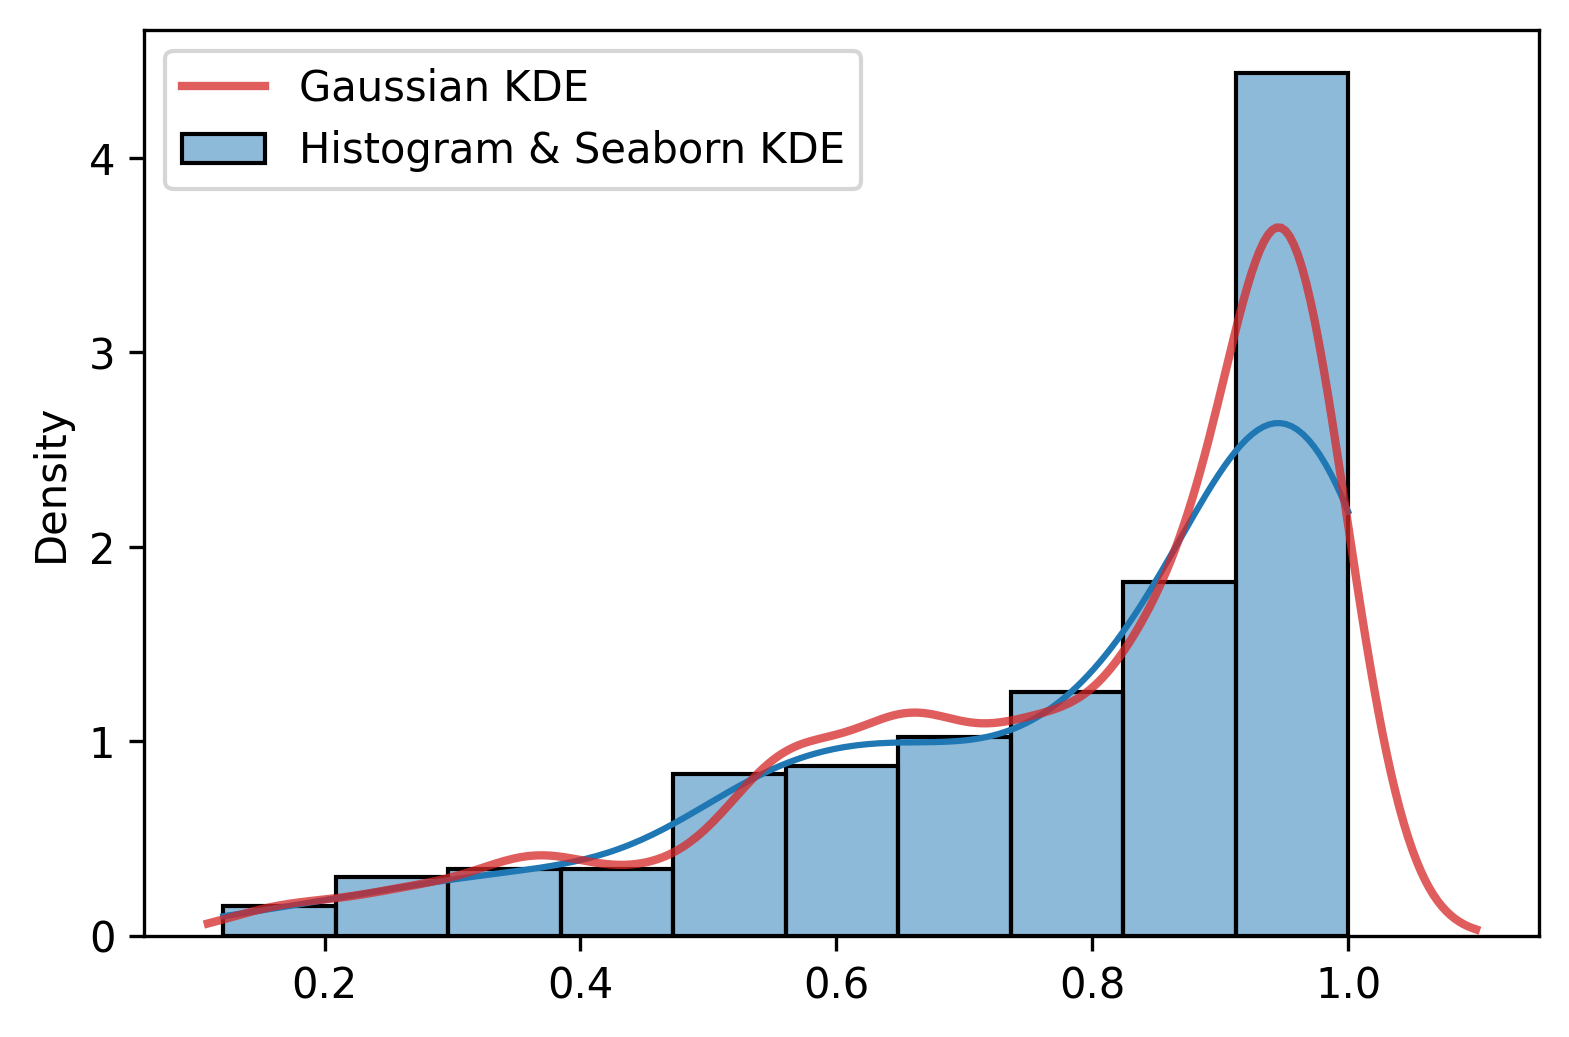

In [3]:
np.random.seed(1234)

k = 10   # using k subintervals
a = np.sqrt(1-np.random.choice(np.linspace(-1,1,3000), size=300, replace=False)**2)
si = subintervals_arr(a, k)

plt.figure(dpi=300)
sns.histplot(x=a, bins=k, stat='density', kde=True, label="Histogram & Seaborn KDE")
plt.plot(
    density(a,si)[0], density(a,si)[1], 
    color='C3', lw=2, alpha=0.75,
    label="Gaussian KDE"
)
plt.legend()
plt.show();

Suggestion: if estimating with Cauchy, use at least twice as many cuts as you would for Gauss.
Suggestion: if estimating with Cauchy, use at least twice as many cuts as you would for Gauss.
Note: Poisson should only be used for skew-left integer data, decreasing on a support [0,N].
Note: Poisson should only be used for skew-left integer data, decreasing on a support [0,N].


c:\Users\Owner\OneDrive\Documents\Interest\kdes\KernelDensityEstimators\KernelDensityEstimator.py:117: UserWarning: Poisson requires a support [0,inf). At the least, ensure that x = [0,N] for large N.
  warn(


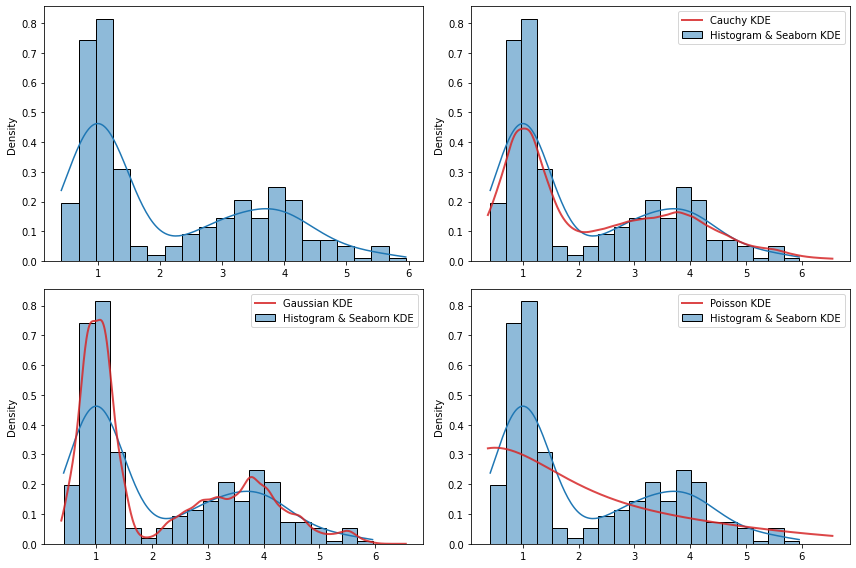

In [4]:
from KernelDensityEstimator import KDE

a = [0.25*s+1 for s in np.random.randn(200)] + [s+3.5 for s in np.random.randn(150)]
k = 20
kde = KDE(a,k)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(x=a, bins=k, stat='density', kde=True, label="Histogram & Seaborn KDE")

plt.subplot(2,2,2)
sns.histplot(x=a, bins=k, stat='density', kde=True, label="Histogram & Seaborn KDE")
plt.plot(
    kde.density('cauchy')[0], kde.density('cauchy')[1], 
    color='C3', lw=2, alpha=0.85,
    label="Cauchy KDE"
)
plt.legend()
plt.subplot(2,2,3)
sns.histplot(x=a, bins=k, stat='density', kde=True, label="Histogram & Seaborn KDE")
plt.plot(
    kde.density()[0], kde.density()[1], 
    color='C3', lw=2, alpha=0.85,
    label="Gaussian KDE"
)
plt.legend()
plt.subplot(2,2,4)
sns.histplot(x=a, bins=k, stat='density', kde=True, label="Histogram & Seaborn KDE")
plt.plot(
    kde.density('poisson')[0], kde.density('poisson')[1], 
    color='C3', lw=2, alpha=0.85,
    label="Poisson KDE"
)
plt.legend()
plt.tight_layout()
plt.show();
